# 接口数据的获取、存储与应用

### 以金融大数据tushare为例

### https://tushare.pro/
http://tushare.org/index.html

## 1 目前在上映电影

In [1]:
import tushare as ts  
import os,time,sys,re,datetime

In [2]:
%timeit df = ts.realtime_boxoffice() #

185 ms ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
df = ts.realtime_boxoffice()
print(df)

   BoxOffice Irank   MovieName boxPer  \
0    1787.63     1       冰雪奇缘2  46.96   
1     655.14     2        利刃出鞘  17.21   
2     596.47     3        两只老虎  15.67   
3     273.15     4    一生有你2019   7.18   
4      79.95     5         冰峰暴   2.10   
5      59.08     6       海上钢琴师   1.55   
6      59.05     7     平原上的夏洛克   1.55   
7      40.28     8  若能与你共乘海浪之上   1.06   
8      37.84     9       大约在冬季   0.99   
9      37.49    10     衣柜里的冒险王   0.98   
10    180.22    11          其它   1.00   

                                          default_url  \
0   http://images.entgroup.cn/group2/M00/02/93/wKg...   
1   http://images.entgroup.cn/group2/M00/02/95/wKg...   
2   http://images.entgroup.cn/group2/M00/02/96/wKg...   
3   http://images.entgroup.cn/group1/M00/05/26/wKg...   
4   http://images.entgroup.cn/group1/M00/05/14/wKg...   
5   http://images.entgroup.cn/group1/M00/05/28/wKg...   
6   http://images.entgroup.cn/group2/M00/02/92/wKg...   
7   http://images.entgroup.cn/group2/M00/02/95/wKg.

In [4]:
??ts

## 2 获取指定股票数据

In [5]:
pro = ts.pro_api('6cbb7738f458c6366abd8601dc143cf493649fb97a7e6b4f43966902')
df = pro.daily(ts_code='600728.sh', start_date='20190401', end_date='20190416')
print(df)

      ts_code trade_date   open   high    low  close  pre_close  change  \
0   600728.SH   20190416  11.15  11.75  11.08  11.69      11.30    0.39   
1   600728.SH   20190415  11.59  11.82  11.26  11.30      11.30    0.00   
2   600728.SH   20190412  11.20  11.57  11.20  11.30      11.19    0.11   
3   600728.SH   20190411  11.70  11.77  11.12  11.19      11.59   -0.40   
4   600728.SH   20190410  11.77  11.77  11.24  11.59      11.76   -0.17   
5   600728.SH   20190409  11.84  12.15  11.66  11.76      11.84   -0.08   
6   600728.SH   20190408  12.26  12.37  11.58  11.84      12.38   -0.54   
7   600728.SH   20190404  12.75  12.92  12.35  12.38      12.78   -0.40   
8   600728.SH   20190403  12.68  13.06  12.61  12.78      12.85   -0.07   
9   600728.SH   20190402  12.72  13.45  12.60  12.85      12.65    0.20   
10  600728.SH   20190401  12.37  12.80  12.25  12.65      12.22    0.43   

    pct_chg         vol       amount  
0    3.4513   427840.42   492634.526  
1    0.0000   445302.

In [6]:
df=df[['ts_code','open','close','pct_chg','vol','amount','trade_date']]

In [7]:
df.reindex(['trade_date'])
df=df.sort_index()
df=df.sort_values(by='trade_date')
df.head(10)

,ts_code,open,close,pct_chg,vol,amount,trade_date
10,600728.SH,12.37,12.65,3.5188,764361.93,958825.117,20190401
9,600728.SH,12.72,12.85,1.5810,1037668.78,1354271.928,20190402
8,600728.SH,12.68,12.78,-0.5447,595345.76,760684.875,20190403
7,600728.SH,12.75,12.38,-3.1299,688628.17,863465.076,20190404
6,600728.SH,12.26,11.84,-4.3619,827695.12,987643.490,20190408
5,600728.SH,11.84,11.76,-0.6757,465878.30,551994.595,20190409
4,600728.SH,11.77,11.59,-1.4456,501787.09,578317.048,20190410
3,600728.SH,11.70,11.19,-3.4513,461470.89,524978.826,20190411
2,600728.SH,11.20,11.30,0.9830,354701.80,403353.920,20190412
1,600728.SH,11.59,11.30,0.0000,445302.60,515447.283,20190415


#### 理解日期类型

In [8]:
TODAY = datetime.date.today()
YTODAY=TODAY-datetime.timedelta(1)
print(TODAY,YTODAY)
CURRENTDAY=TODAY.strftime('%Y-%m-%d')
print(CURRENTDAY)
CURRENTDAY=YTODAY.strftime('%Y%m%d')
print(CURRENTDAY)

#时间

2019-11-30 2019-11-29
2019-11-30
20191129


In [9]:
df = pro.daily(ts_code='600728.SH',end_date=CURRENTDAY)
df.head(100)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600728.SH,20191129,8.66,8.91,8.64,8.75,8.63,0.12,1.3905,184276.00,162093.411
1,600728.SH,20191128,8.60,8.71,8.55,8.63,8.59,0.04,0.4657,106042.77,91568.299
2,600728.SH,20191127,8.51,8.64,8.51,8.59,8.53,0.06,0.7034,86742.01,74492.989
3,600728.SH,20191126,8.63,8.66,8.51,8.53,8.59,-0.06,-0.6985,86060.74,73798.775
4,600728.SH,20191125,8.71,8.76,8.50,8.59,8.70,-0.11,-1.2644,119025.72,102305.740
5,600728.SH,20191122,8.87,8.97,8.69,8.70,8.86,-0.16,-1.8059,167303.24,146969.877
6,600728.SH,20191121,8.94,8.94,8.80,8.86,8.93,-0.07,-0.7839,113459.72,100401.970
7,600728.SH,20191120,9.06,9.12,8.91,8.93,9.05,-0.12,-1.3260,120809.72,108857.281
8,600728.SH,20191119,8.88,9.10,8.88,9.05,8.87,0.18,2.0293,170884.54,154196.044
9,600728.SH,20191118,8.78,8.90,8.76,8.87,8.82,0.05,0.5669,91700.23,81184.896


In [66]:
df.shape

(4000, 11)

#### 获取所有交易标的某天的交易数据

In [67]:
df = pro.daily(trade_date='20181120')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20181120,10.75,10.80,10.52,10.57,10.85,-0.28,-2.5806,1033877.53,1099654.683
1,000002.SZ,20181120,25.78,26.43,25.23,25.65,25.97,-0.32,-1.2322,474151.80,1221340.780
2,000004.SZ,20181120,17.33,17.48,16.80,16.92,17.33,-0.41,-2.3658,4911.00,8369.820
3,000005.SZ,20181120,3.11,3.13,3.03,3.06,3.17,-0.11,-3.4700,138100.03,42348.709
4,000006.SZ,20181120,5.66,5.70,5.47,5.49,5.81,-0.32,-5.5077,293993.88,164306.995


In [68]:
df.shape

(3520, 11)

## 3 利用20日均线进行量化交易

In [69]:
#某标的某段时间交易数据，不含均线数据
df = pro.daily(ts_code='600728.sh', end_date='20181118')
df.head() 

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600728.SH,20181116,8.35,8.36,7.93,8.15,7.79,0.36,4.6213,1244701.10,1019665.838
1,600728.SH,20181115,7.79,7.79,7.79,7.79,7.08,0.71,10.0282,175086.39,136392.298
2,600728.SH,20181114,7.06,7.22,7.01,7.08,7.06,0.02,0.2833,235544.84,167637.213
3,600728.SH,20181113,6.95,7.28,6.95,7.06,7.05,0.01,0.1418,310362.62,220376.360
4,600728.SH,20181112,6.97,7.06,6.88,7.05,6.90,0.15,2.1739,180260.71,126159.363


In [70]:
#某标的某段时间交易数据，含均线数据
df = ts.get_hist_data('600728')
df.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-11-18,8.78,8.90,8.87,8.76,86821.23,0.05,0.57,8.894,9.067,9.310,129719.13,187072.11,268477.66
2019-11-15,8.91,9.02,8.82,8.82,115782.48,-0.16,-1.78,8.898,9.142,9.326,169025.81,203254.84,283465.37
2019-11-14,8.81,9.03,8.98,8.81,147286.36,0.14,1.58,8.982,9.225,9.361,186014.79,215347.67,313837.70
2019-11-13,8.91,8.95,8.84,8.80,116428.85,-0.12,-1.34,9.032,9.281,9.368,210048.00,231327.61,318427.03
2019-11-12,8.89,9.00,8.96,8.76,182276.73,0.07,0.79,9.128,9.360,9.388,237325.87,260226.42,323683.86


In [71]:
df.shape

(609, 13)

In [72]:
def parse(scode):
    '''process stock'''
    is_buy    = 0
    buy_val   = []
    buy_date  = []
    sell_val  = []
    sell_date = []
    df = ts.get_hist_data(scode)
    ma10 = df[u'ma10']
    close = df[u'close']
    rate = 1.0
    idx = len(ma10)
    while idx > 0:
        idx -= 1
        close_val = close[idx]
        ma10_val = ma10[idx]
        if close_val > ma10_val:
                if is_buy == 0:
                        is_buy = 1
                        buy_val.append(close_val)
                        buy_date.append(close.keys()[idx])
        elif close_val < ma10_val:
                if is_buy == 1:
                        is_buy = 0
                        sell_val.append(close_val)
                        sell_date.append(close.keys()[idx])

    print("stock number: %s" %STOCK)
    print("buy count   : %d" %len(buy_val))
    print("sell count  : %d" %len(sell_val))

    for i in range(len(sell_val)):
        rate = rate * (sell_val[i] * (1 - 0.002) / buy_val[i])
        print("buy date : %s, buy price : %.2f" %(buy_date[i], buy_val[i]))
        print("sell date: %s, sell price: %.2f" %(sell_date[i], sell_val[i]))

    print("rate: %.2f" % rate)

In [73]:
STOCK = '600728'       ##佳都
parse(STOCK)

stock number: 600728
buy count   : 45
sell count  : 45
buy date : 2017-05-24, buy price : 7.20
sell date: 2017-06-01, sell price: 7.24
buy date : 2017-06-02, buy price : 7.37
sell date: 2017-06-09, sell price: 7.35
buy date : 2017-06-21, buy price : 7.37
sell date: 2017-07-17, sell price: 7.87
buy date : 2017-07-20, buy price : 8.89
sell date: 2017-08-01, sell price: 8.62
buy date : 2017-08-07, buy price : 8.58
sell date: 2017-09-14, sell price: 11.34
buy date : 2017-10-09, buy price : 11.00
sell date: 2017-10-11, sell price: 10.70
buy date : 2017-10-30, buy price : 10.13
sell date: 2017-11-03, sell price: 9.53
buy date : 2017-11-07, buy price : 9.90
sell date: 2017-11-22, sell price: 10.18
buy date : 2017-12-07, buy price : 8.64
sell date: 2017-12-12, sell price: 8.52
buy date : 2017-12-15, buy price : 8.58
sell date: 2017-12-18, sell price: 8.40
buy date : 2017-12-29, buy price : 8.25
sell date: 2018-01-12, sell price: 8.40
buy date : 2018-02-14, buy price : 6.89
sell date: 2018-03-1

## 4 选取某三个行业中上市公司若干关键指标（市盈率，市净率等）的相关性

In [2]:
from collections import OrderedDict 
import numpy as np 
import pandas as pd 
import datetime as dt 
import seaborn as sns 
import tushare as ts 
#from bokeh.io import output_file,show
#from bokeh.plotting import figure

In [14]:
cls = ts.get_industry_classified() 
stk = ts.get_stock_basics() 

cls = cls.set_index('code') 
tcls = cls[['c_name']] 
tstk = stk[['pe', 'pb', 'esp', 'bvps']] 
df = tcls.join(tstk, how='inner') 
clist = [df.iloc[i]['c_name'] for i in range(3)]

def neq(a, b, eps=1e-6): return abs(a - b) > eps 
tdf = df.loc[df['c_name'].isin(clist) & neq(df['pe'], 0.0) & neq(df['pb'], 0.0) & neq(df['esp'], 0.0) & neq(df['bvps'], 0.0)] 

col_mapping = {'pe' : u'P/E', 'pb' : u'P/BV', 'esp' : u'EPS', 'bvps' : u'BVPS'} 
tdf.rename(columns=col_mapping, inplace=True) 
sns.pairplot(tdf, hue='c_name', size=2.5)


,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
002517,恺英网络,互联网,福建,63.59,16.00,21.53,61.68,24.85,0.24,7.40,...,2.29,1.23,20101207,26.48,1.23,-13.31,-85.51,68.63,4.74,75843.0
002247,聚力文化,互联网,浙江,0.00,5.45,8.51,31.50,22.43,3.44,30.24,...,2.37,1.24,20080612,-19.15,-2.25,-20.24,-102.08,10.87,-0.32,32982.0
002528,英飞拓,IT设备,深圳,234.38,10.46,11.99,60.70,36.85,1.22,23.01,...,3.11,1.75,20101224,0.46,0.04,8.88,-68.24,20.22,0.70,51316.0
600770,综艺股份,综合类,江苏,329.71,13.00,13.00,58.76,23.69,11.64,22.26,...,2.67,2.04,19961120,0.14,0.01,-2.61,-81.03,28.20,4.48,76440.0
601599,鹿港文化,影视音像,江苏,24.69,8.93,8.93,64.79,45.49,8.83,9.69,...,2.94,1.08,20110527,6.88,0.77,-18.14,32.66,18.72,3.41,34574.0
000859,国风塑业,塑料,安徽,36.15,7.39,7.39,21.01,8.69,7.70,5.90,...,2.21,2.18,19981119,2.28,0.31,14.62,-1.11,12.34,7.36,72854.0
002502,鼎龙文化,影视音像,广东,0.00,6.97,8.60,17.65,12.36,0.69,16.37,...,1.94,1.97,20101117,-8.55,-0.99,512.63,-1494.35,6.84,-58.86,38986.0
600599,熊猫金控,多元金融,湖南,0.00,1.66,1.66,8.11,7.76,0.01,5.16,...,3.94,2.61,20010828,-0.46,-0.28,-52.67,29.42,35.99,-17.91,28186.0
300341,麦克奥迪,电气设备,福建,34.74,5.10,5.10,15.95,10.87,2.86,0.00,...,1.86,5.12,20120726,4.05,0.79,14.70,10.20,44.23,13.21,13949.0


In [8]:
tdf

,c_name,P/E,P/BV,EPS,BVPS
code,,,,,
000001,金融行业,10.11,1.19,1.320,13.82
000002,房地产,12.42,1.81,1.630,14.80
000005,房地产,52.93,2.05,0.042,1.45
000006,房地产,11.56,1.09,0.335,4.73
000009,房地产,43.76,2.17,0.078,2.09
000011,房地产,39.68,1.67,0.173,5.47
000029,房地产,18.94,3.11,0.434,3.53
000031,房地产,8.70,1.64,0.620,4.39
000036,房地产,7.04,1.21,0.410,3.19


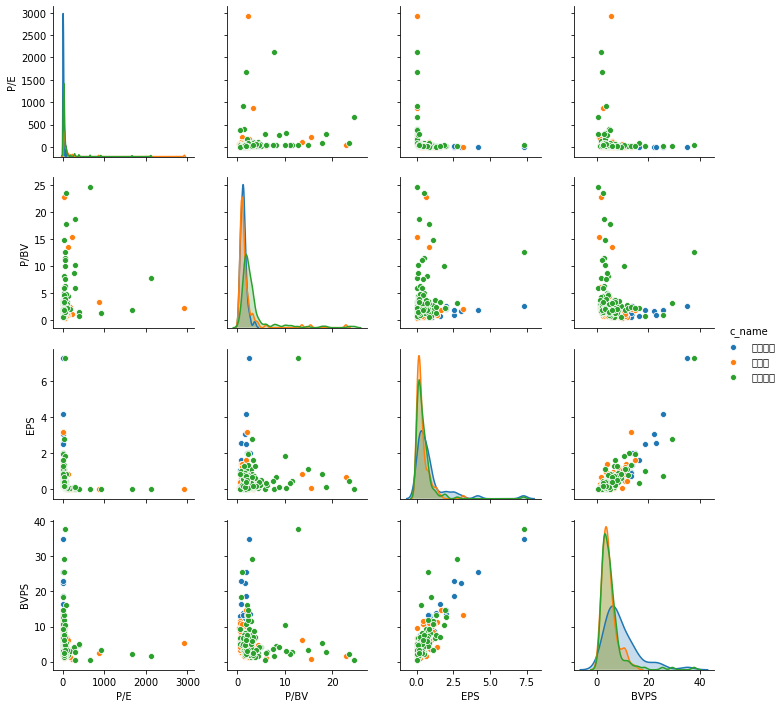

In [79]:
%matplotlib inline
sns.pairplot(tdf, hue='c_name', size=2.5)

## 5 均线和candlestick图

In [24]:
import numpy as np 
import pandas as pd 
import datetime as dt 
#import pandas.io.data as web 
from pandas_datareader import data, wb

import matplotlib
import matplotlib.dates as mdates 
import matplotlib.mlab as mlab 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as font_manager 

import mpl_finance as finance

%matplotlib inline

import tushare as ts  
pro = ts.pro_api('6cbb7738f458c6366abd8601dc143cf493649fb97a7e6b4f43966902')

In [22]:
begin_time = '20181101' 
end_time = '20181121' 
code = "600728.sh" 
#df = ts.get_hist_data(code, start=begin_time, end=end_time) 
df = pro.daily(ts_code='600728.sh',start_date=begin_time, end_date=end_time)
df = df.sort_index(0) 
df_idx = df.index.values 
# df.plot() 
print(df.head())

     ts_code trade_date  open  high   low  close  pre_close  change  pct_chg  \
0  600728.SH   20181121  7.95  8.14  7.66   7.97       7.90    0.07   0.8861   
1  600728.SH   20181120  8.05  8.30  7.88   7.90       8.29   -0.39  -4.7045   
2  600728.SH   20181119  8.15  8.47  8.12   8.29       8.15    0.14   1.7178   
3  600728.SH   20181116  8.35  8.36  7.93   8.15       7.79    0.36   4.6213   
4  600728.SH   20181115  7.79  7.79  7.79   7.79       7.08    0.71  10.0282   

          vol       amount  
0   578565.40   458542.728  
1   614633.81   494248.015  
2   891646.23   738173.447  
3  1244701.10  1019665.838  
4   175086.39   136392.298  


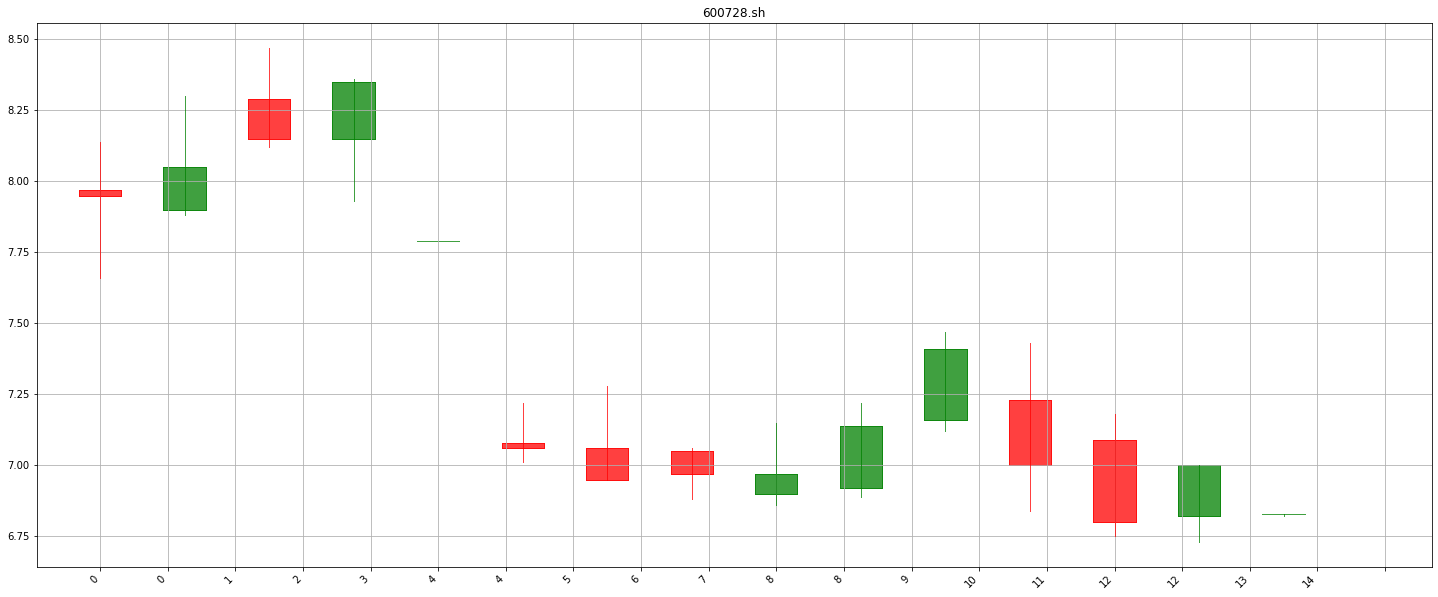

In [25]:
fig, ax = plt.subplots(figsize=(25, 10)) # 设置图片大小。 
# https://matplotlib.org/api/finance_api.html#module-matplotlib.finance 
# matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g', alpha=0.75) 
finance.candlestick2_ochl(ax = ax, 
                  opens=df["open"].values, 
                  closes=df["close"].values, 
                  highs=df["high"].values, 
                  lows=df["low"].values, 
                  width=0.5, colorup='r', colordown='g', alpha=0.75) 
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(25)) 
# 设置自动格式化时间。 
def mydate_formatter(x,pos): 
    try: 
        return df_idx[int(x)] 
    except IndexError: 
        return '' 

ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(mydate_formatter)) 
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') 
ax.grid(True) 
plt.title(code) 
plt.show()


## 7  交易明细数据与分时数据

In [26]:
import numpy as np 
import pandas as pd 
import datetime as dt 
import seaborn as sns 
import tushare as ts 

In [27]:
df = ts.get_tick_data('600728',date='2018-10-30',retry_count=5, pause=0.5,src='tt')
df.head(10)

,time,price,change,volume,amount,type
0,09:25:02,5.99,0.04,754,451646,卖盘
1,09:30:02,5.98,-0.01,470,280683,中性盘
2,09:30:05,5.98,0.00,265,158598,买盘
3,09:30:08,5.99,0.01,130,77768,买盘
4,09:30:10,5.97,-0.02,12,7164,卖盘
5,09:30:14,5.99,0.02,64,38257,买盘
6,09:30:23,5.99,0.00,7,4193,买盘
7,09:30:25,5.99,0.00,27,16173,买盘
8,09:30:32,5.98,-0.01,9,5382,卖盘
9,09:30:41,5.99,0.01,2,1198,买盘


In [29]:
df = ts.get_hist_data('600728',start='2018-11-01',end='2018-11-21',ktype='60',retry_count=3, pause=0.5)
df.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,


## 8  talib 技术指标

http://www.lfd.uci.edu/~gohlke/pythonlibs/ 下载安装 TA-Lib

In [79]:
#coding=utf-8
import tushare as ts
import talib as ta
import numpy as np
import pandas as pd
import os,time,sys,re,datetime
import csv
import scipy

In [122]:
#两个函数
#1、get_stock_basics()，这里得到是对应的dataframe数据结构，code,代码 name,名称 industry,所属行业 area,地区 pe,市盈率 
# outstanding,流通股本 totals,总股本(万) totalAssets,总资产(万)liquidAssets,流动资产 fixedAssets,固定资产 reserved,公积金
# reservedPerShare,每股公积金 eps,每股收益 bvps,每股净资 pb,市净率 timeToMarket,上市日期

#2、get_hist_data(),获取每只股票的历史价格和成交量 对应的列有index列,0 - 6列是 date：日期 open：开盘价 high：最高价 close：收盘价 
# low：最低价 volume：成交量 price_change：价格变动 p_change：涨跌幅
# 7-12列是 ma5：5日均价 ma10：10日均价 ma20:20日均价 v_ma5:5日均量v_ma10:10日均量 v_ma20:20日均量

#1 、首先是获取沪深两市的股票列表
def Get_Stock_List():
    df = ts.get_stock_basics()
    return df

#然后定义通过MACD判断买入卖出
def Get_MACD(df_Code):
    operate_array=[]
    stcok_code=df_Code.index
    for code in df_Code.index:
        df = ts.get_hist_data(code,start='2016-01-03')
        if df is None:           #如code代表的是一个未上市的新股
            stcok_code=stcok_code.drop(code)
            continue   
        dflen = df.shape[0]
        operate = 0
        if dflen>35:
            macd, macdsignal, macdhist = ta.MACD(np.array(df['close']), fastperiod=12, slowperiod=26, signalperiod=9)
                   
            SignalMA5 = ta.MA(macdsignal, timeperiod=5, matype=0)
            SignalMA10 = ta.MA(macdsignal, timeperiod=10, matype=0)
            SignalMA20 = ta.MA(macdsignal, timeperiod=20, matype=0)
            
            #在后面增加3列，分别是13-15列，对应的是 DIFF  DEA  DIFF-DEA       
            df['macd']=pd.Series(macd,index=df.index)            #DIFF
            df['macdsignal']=pd.Series(macdsignal,index=df.index)#DEA
            df['macdhist']=pd.Series(macdhist,index=df.index)    #DIFF-DEA

            MAlen = len(SignalMA5)

            #2个数组 1.DIFF、DEA均为正，DIFF向上突破DEA，买入信号。 2.DIFF、DEA均为负，DIFF向下跌破DEA，卖出信号。

            if df.iat[(dflen-1),13]>0:
                if df.iat[(dflen-1),14]>0:
                    if df.iat[(dflen-1),13]>df.iat[(dflen-1),14]:
                        operate = operate + 1#买入
            else:
                if df.iat[(dflen-1),14]<0:
                    if df.iat[(dflen-1),13]<0:
                        operate = operate - 1#卖出
       
            #3.DEA线与K线发生背离，行情反转信号。
            if df.iat[(dflen-1),7]>=df.iat[(dflen-1),8] and df.iat[(dflen-1),8]>=df.iat[(dflen-1),9]:     #K线上涨
                if SignalMA5[MAlen-1]<=SignalMA10[MAlen-1] and SignalMA10[MAlen-1]<=SignalMA20[MAlen-1]:  #DEA下降
                    operate = operate - 1
            elif df.iat[(dflen-1),7]<=df.iat[(dflen-1),8] and df.iat[(dflen-1),8]<=df.iat[(dflen-1),9]:   #K线下降
                if SignalMA5[MAlen-1]>=SignalMA10[MAlen-1] and SignalMA10[MAlen-1]>=SignalMA20[MAlen-1]:  #DEA上涨
                    operate = operate + 1
                    
            #4.分析MACD柱状线，由负变正，买入信号。
            if df.iat[(dflen-1),15]>0 and dflen >30 :
                for i in range(1,26):
                    if df.iat[(dflen-1-i),15]<=0:#
                        operate = operate + 1
                        break
            #由正变负，卖出信号   
            if df.iat[(dflen-1),15]<0 and dflen >30 :
                for i in range(1,26):
                    if df.iat[(dflen-1-i),15]>=0:#
                        operate = operate - 1
                        break
                        
        operate_array.append(operate)        
    df_Code['MACD']=pd.Series(operate_array,index=stcok_code)   
    return df_Code

 

#输出CSV文件
def Output_Csv(df,Dist,industry_name):
    TODAY = datetime.date.today()
    CURRENTDAY=TODAY.strftime('%Y-%m-%d')
    df.to_csv(Dist+industry_name+CURRENTDAY+'stock.csv',encoding='gbk')#选择保存   


In [123]:
df = Get_Stock_List()

In [124]:
df.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
688138,N清溢,元器件,深圳,70.70,0.61,2.67,8.22,2.73,3.70,0.27,...,4.15,4.71,20191120,3.29,1.23,0.00,0.00,33.90,15.84,54542.0
600397,安源煤业,煤炭开采,江西,0.00,9.90,9.90,64.38,21.81,32.45,18.63,...,0.77,2.95,20020702,-24.36,-2.46,13.71,-205.26,7.35,-2.15,53192.0
600532,宏达矿业,普钢,上海,0.00,5.16,5.16,33.22,27.16,0.03,10.48,...,3.25,1.24,20021031,0.98,0.19,205.86,-232.79,3.34,-3.83,30835.0
002354,天神娱乐,互联网,辽宁,0.00,7.00,9.32,72.53,19.63,1.01,58.87,...,1.71,1.79,20100209,-53.02,-5.69,-44.46,-261.61,55.28,-39.14,51788.0
002528,英飞拓,IT设备,深圳,258.03,10.46,11.99,60.70,36.85,1.22,23.01,...,3.11,1.93,20101224,0.46,0.04,8.88,-68.24,20.22,0.70,51316.0


In [125]:
df['industry'].head(100)

code
688138     元器件
600397    煤炭开采
600532      普钢
002354     互联网
002528    IT设备
000509    其他建材
000892    影视音像
000677      化纤
000523    日用化工
603336    农业综合
300655    化工原料
000713     种植业
300748     元器件
603496    IT设备
002967     综合类
002405    软件服务
600651    电器仪表
300803    软件服务
300799    软件服务
300127     元器件
002256    染料涂料
000587     批发业
000506      黄金
300802    IT设备
603976    医疗保健
002417    多元金融
300796    化工原料
300797    电器仪表
300168    软件服务
300341    电气设备
          ... 
002359    通信设备
600980     元器件
300777      化纤
002684    电气设备
600127    农业综合
300659    软件服务
603655    汽车配件
600634     互联网
002901    医疗保健
600856    供气供热
002089    通信设备
000613    旅游服务
002862    文教休闲
002005    家用电器
002021    纺织机械
603882    医疗保健
002850    机械基件
600792    焦炭加工
600654    软件服务
000700    汽车配件
000034     综合类
603858     中成药
600313     种植业
601258    汽车服务
600725    焦炭加工
600614     综合类
603533     互联网
300014    电气设备
600311      黄金
603517      食品
Name: industry, Length: 100, dtype: object

In [126]:
df1=df[df['industry']=='酒店餐饮']
df2=df[df['industry']=='电信运营']

In [127]:
df1.index

Index(['002306', '600754', '000428', '002186', '000721', '601007', '600258',
       '000524', '000007'],
      dtype='object', name='code')

In [128]:
df11 = Get_MACD(df1)
df22 = Get_MACD(df2)
Dist = 'data/'
name1 = '酒店餐饮'
name2 = '电信运营'
Output_Csv(df11,Dist,name1)
Output_Csv(df22,Dist,name2)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
import requests
from lxml import etree

#设置抓取的网址信息
get_url = 'https://sh.xiaozhu.com/putuo-duanzufang-8/'

#设置User-Agent信息
#最好设置自己的User-Agentpost_url
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

#使用requests访问网页，获取网页内容
ss = requests.Session()

#获取网页内容
content = ss.get(url=get_url,headers=headers).text

#使用lxml构造文档对象模型DOM
html = etree.HTML(content)

In [49]:
def get_url(url,headers):
    ss = requests.Session()
    resp = ss.get(url, headers=headers)
    html = resp.text
  
    return html

#解析网页内容，利用1完成的内容，把里面缺失的代码补齐。
house=[]  #存放抓取的房源信息
def parse_html(content):
    html = etree.HTML(content)
    house_list = html.xpath('//div[@id="page_list"]//ul/li')
    print(len(house_list))

    house=[]  #存放抓取的房源信息
    if len(house_list):
        for tr in house_list:
            item = {}   #临时存放当前的一条房源信息

            #房源标题与价格
            #Problem 1a  ： 获取房源标题、价格存放在字典item的键title与price中，价格只保留数字 
            #your code
            item['title'] = tr.xpath('./div[2]/div[2]/a/span/text()')[0]#换成您的code
            item['price'] = tr.xpath('./div[2]/div[1]/span/i/text()')[0]#换成您的code


            #房源基本信息：出租类型、房型、床位数、宜住人数
            #Problem 1b  ： 先获取房源基本信息存放在houseinfo中
            #your code
            houseinfo= tr.xpath('./div[2]/div[2]/em/text()')[0]#换成您的code


            #再拆分成：出租类型、房型、床位数houseinfo、宜住人数 ,注意并不是每个房源都有这4个信息
            #your code

            list1=[]
            list1=houseinfo.split('/')
            if len(list1)==4:
                renttype=list1[0] 
                housetype=list1[1] 
                beds=list1[2] 
                person=list1[3]
            else:
                renttype=list1[0]  
                housetype=''
                beds=list1[1] 
                person=list1[2]


            #上面代码处理好后再存入字典item
            item['renttype'] =str(renttype).strip()
            item['housetype'] =str(housetype).strip()
            item['beds'] =str(beds).strip()
            item['person'] =str(person).strip()

            #房源评分、评论数
            #先获取房源评论信息reviews，
            reviews="".join(tr.xpath('.//em[@class="hiddenTxt"]/span/text()'))
            #再拆分成：房源评分、评论数
            reviews=reviews.split('/')
            if len(reviews)==2:
                score,reviewnum=reviews
            else:
                score=0
                reviewnum=reviews[0]
            item['score'] =str(score).strip()
            item['reviewnum'] =str(reviewnum).strip()        

            house.append([item['title'],item['price'],item['renttype'],item['housetype'],item['beds'],item['person'],item['score'],item['reviewnum']])
    return house

html=get_url("https://sh.xiaozhu.com/putuo-duanzufang-8/", headers)
house = parse_html(html)
#print(house)

print([[1,1],[2,2]] + [[1,1],[2,2]])

24
[[1, 1], [2, 2], [1, 1], [2, 2]]
